<a href="https://colab.research.google.com/github/Sanjay3005v/LPF-using-ANN/blob/main/trialmodel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Create a pandas DataFrame from the paper's dataset
data = {
    'W1': [7.9, 7.9, 7.9, 7.9, 7.5, 7.5, 7.5, 7.5, 7.5, 7.2, 7.2, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7.7],
    'L1': [3.0, 3.2, 3.2, 3.2, 3.2, 3.0, 3.0, 3.0, 3.0, 3.0, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 3.0],
    'W2': [0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.1],
    'L2': [0.3, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 0.3, 0.4, 0.4, 0.5, 0.5, 0.5, 0.4, 0.3, 0.2, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.2, 0.2, 0.2, 0.3, 0.4, 0.5, 0.4, 0.3, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.3],
    'Fc': [2.71, 2.64, 2.71, 2.64, 2.72, 2.80, 2.80, 2.80, 2.90, 2.90, 3.20, 3.20, 3.20, 3.40, 3.00, 2.90, 2.85, 3.00, 3.00, 3.10, 3.10, 3.18, 3.13, 3.06, 3.03, 3.06, 3.18, 3.17, 3.27, 3.17, 3.11, 3.08, 3.17, 3.17, 3.23, 3.15, 3.30, 3.27, 3.17, 3.15, 3.17, 3.22, 3.30, 3.40, 3.36, 3.27, 3.28, 3.36, 3.48, 2.70],
    'BW': [8.48, 8.73, 9.12, 9.13, 8.86, 8.60, 8.16, 8.48, 8.80, 8.90, 9.00, 8.90, 8.70, 8.35, 8.75, 8.40, 7.95, 7.75, 8.00, 8.25, 8.60, 8.50, 8.10, 8.02, 7.80, 8.10, 8.50, 8.70, 8.70, 8.30, 7.90, 8.00, 8.20, 8.40, 8.70, 9.20, 8.70, 8.20, 8.00, 7.65, 8.20, 8.40, 8.80, 8.60, 8.10, 7.80, 8.30, 8.70, 8.90, 8.50],
    'IL': [0.20, 0.15, 0.15, 0.15, 0.20, 0.25, 0.25, 0.30, 0.35, 0.30, 0.50, 0.60, 0.50, 0.50, 0.55, 0.50, 0.30, 0.70, 0.70, 0.80, 0.85, 0.91, 0.85, 0.80, 0.75, 0.80, 0.83, 0.87, 1.00, 0.95, 0.90, 0.84, 0.87, 0.91, 0.95, 1.05, 1.10, 1.05, 1.00, 0.95, 0.98, 1.00, 1.05, 1.20, 1.10, 1.10, 1.10, 1.20, 1.20, 0.20]
}
df = pd.DataFrame(data)

# Split the data into features (X) and targets (y)
X = df[['W1', 'L1', 'W2', 'L2']]
y = df[['Fc', 'BW', 'IL']]

# Split the data according to the paper: 39 training, 10 testing, 1 validation [cite: 252, 254, 338]
X_train = X.iloc[0:39]
y_train = y.iloc[0:39]

X_test = X.iloc[39:49]
y_test = y.iloc[39:49]

X_val = X.iloc[49:]
y_val = y.iloc[49:]

# Scale the features. This is crucial for neural network performance.
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
X_val_scaled = scaler_X.transform(X_val)

# Scale the targets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)
y_val_scaled = scaler_y.transform(y_val)


print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)
print("Validation data shape:", X_val_scaled.shape)

Training data shape: (39, 4)
Testing data shape: (10, 4)
Validation data shape: (1, 4)


In [ ]:
# Build the Sequential model
model = Sequential()

# Input layer (shape of 4 for the 4 input features) and first hidden layer
model.add(Dense(5, activation='sigmoid', input_shape=(4,)))

# Second hidden layer
model.add(Dense(6, activation='sigmoid'))

# Output layer (3 neurons for the 3 output values). Linear activation for regression.
model.add(Dense(3))

# Print a summary of the model to verify its structure
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82 (328.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
print("Model compiled successfully.")

Model compiled successfully.


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 0.7943 - root_mean_squared_error: 0.8912 - val_loss: 1.4699 - val_root_mean_squared_error: 1.2124
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.7931 - root_mean_squared_error: 0.8906 - val_loss: 1.4674 - val_root_mean_squared_error: 1.2114
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.7880 - root_mean_squared_error: 0.8877 - val_loss: 1.4639 - val_root_mean_squared_error: 1.2099
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.7511 - root_mean_squared_error: 0.8661 - val_loss: 1.4595 - val_root_mean_squared_error: 1.2081
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.8003 - root_mean_squared_error: 0.8945 - val_loss: 1.4549 - val_root_mean_squared_error: 1.2062
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7663 - root_mean_squared_error: 0.8753 - val_loss: 1.4508 - val_root_mean_squared_error: 1.2045
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.7

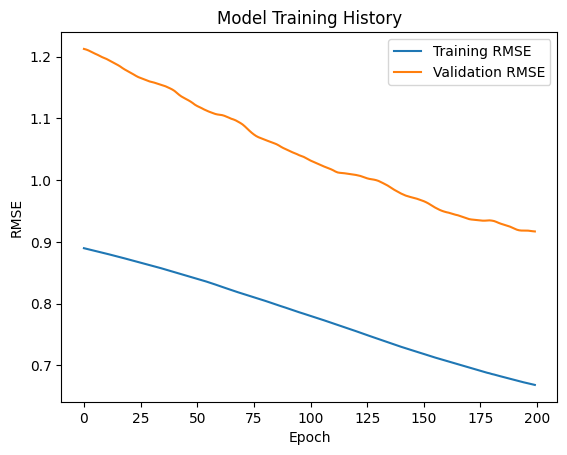

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=200,
    validation_data=(X_test_scaled, y_test_scaled),
    verbose=1  # Set to 1 if you want to see the progress for each epoch
)

print("Training complete!")

# You can optionally plot the training history to see how the model learned
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Model Training History')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_rmse = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Final RMSE on Test Data: {test_rmse:.4f}")

Final RMSE on Test Data: 1.3106


In [ ]:
# Make a prediction on the scaled validation data
predicted_scaled = model.predict(X_val_scaled)

# IMPORTANT: We must reverse the scaling to get the values in their original units
predicted_unscaled = scaler_y.inverse_transform(predicted_scaled)

# Get the actual values from the original dataframe
actual_values = y_val.values[0]

# Print the comparison
print("--- Prediction on Validation Sample ---")
print(f"Predicted Values (Fc, BW, IL): {predicted_unscaled[0]}")
print(f"Actual Values (Fc, BW, IL):    {actual_values}")
print("---------------------------------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
--- Prediction on Validation Sample ---
Predicted Values (Fc, BW, IL): [2.7715337  8.58725    0.20120315]
Actual Values (Fc, BW, IL):    [2.7 8.5 0.2]
---------------------------------------


In [ ]:
import pandas as pd
import numpy as np

# --- Configuration ---
# You can change these values to experiment
num_synthetic_samples = 2000  # How many new data points to create
noise_factor = 0.05          # How much randomness to add (5% noise)

# --- Original DataFrame (ensure you have this from previous steps) ---
# This is the DataFrame 'df' with 50 samples we created earlier.
# If you don't have it in your current session, rerun the cell from Step 3 of our guide.

# --- Data Augmentation Logic ---
print(f"Original dataset size: {len(df)} samples")

# Separate features (X) and targets (y) for noise calculation
X_orig = df[['W1', 'L1', 'W2', 'L2']]
y_orig = df[['Fc', 'BW', 'IL']]

# Calculate the standard deviation to scale the noise appropriately
X_noise_scale = X_orig.std() * noise_factor
y_noise_scale = y_orig.std() * noise_factor

synthetic_data = []
for _ in range(num_synthetic_samples):
    # Randomly pick a sample from the original dataset
    random_index = np.random.randint(0, len(df))
    base_sample = df.iloc[random_index]

    # Create noise and add it to the base sample
    X_noise = np.random.normal(0, X_noise_scale)
    y_noise = np.random.normal(0, y_noise_scale)

    new_X = base_sample[['W1', 'L1', 'W2', 'L2']] + X_noise
    new_y = base_sample[['Fc', 'BW', 'IL']] + y_noise

    # Combine new X and y into a single record
    new_record = pd.concat([new_X, new_y])
    synthetic_data.append(new_record)

# Create a DataFrame from the synthetic data
df_synthetic = pd.DataFrame(synthetic_data)

# Combine the original and synthetic dataframes
df_augmented = pd.concat([df, df_synthetic], ignore_index=True)

print(f"New augmented dataset size: {len(df_augmented)} samples")
print("\nData augmentation complete! You can now use 'df_augmented' to train your model.")

Original dataset size: 50 samples
New augmented dataset size: 2050 samples

Data augmentation complete! You can now use 'df_augmented' to train your model.


In [ ]:
from sklearn.model_selection import train_test_split

# --- 1. Prepare the Augmented Data ---
X_aug = df_augmented[['W1', 'L1', 'W2', 'L2']]
y_aug = df_augmented[['Fc', 'BW', 'IL']]

# Split into new training and testing sets (e.g., 80% train, 20% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_aug, y_aug, test_size=0.2, random_state=42
)

# --- 2. Scale the New Data ---
# It's important to re-fit the scaler on the new, larger training data
scaler_X_aug = StandardScaler()
X_train_aug_scaled = scaler_X_aug.fit_transform(X_train_aug)
X_test_aug_scaled = scaler_X_aug.transform(X_test_aug)

scaler_y_aug = StandardScaler()
y_train_aug_scaled = scaler_y_aug.fit_transform(y_train_aug)
y_test_aug_scaled = scaler_y_aug.transform(y_test_aug)

# --- 3. Re-Train and Evaluate Your Model ---
# Use the same model architecture and compile step as before
# Then, train it on the new augmented data
history = model.fit(
    X_train_aug_scaled,
    y_train_aug_scaled,
    epochs=200,
    validation_data=(X_test_aug_scaled, y_test_aug_scaled),
    verbose=1 # Set to 1 to see epoch progress
)

print("Training on augmented data complete!")

# Now, regenerate your graphs, and you should see a significant improvement.

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1194 - root_mean_squared_error: 0.3454 - val_loss: 0.1271 - val_root_mean_squared_error: 0.3566
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1117 - root_mean_squared_error: 0.3340 - val_loss: 0.1265 - val_root_mean_squared_error: 0.3556
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1074 - root_mean_squared_error: 0.3276 - val_loss: 0.1262 - val_root_mean_squared_error: 0.3553
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1209 - root_mean_squared_error: 0.3475 - val_loss: 0.1258 - val_root_mean_squared_error: 0.3546
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1212 - root_mean_squared_error: 0.3479 - val_loss: 0.1252 - val_root_mean_squared_error: 0.3538
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1192 - root_mean_squared_error: 0.3452 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3531
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- 1. Define a More Complex Model ---
# We give the model more neurons to increase its ability to "memorize" the data
model_aggressive = Sequential()
model_aggressive.add(Dense(32, activation='sigmoid', input_shape=(4,))) # Increased from 5
model_aggressive.add(Dense(32, activation='sigmoid'))                  # Increased from 6
model_aggressive.add(Dense(3))

# --- 2. Compile the Model (can use default Adam) ---
model_aggressive.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

# --- 3. Train for More Epochs ---
# Training for longer gives the optimizer more time to find a better solution
# We are using the augmented data we created previously for a better result
history = model_aggressive.fit(
    X_train_aug_scaled,
    y_train_aug_scaled,
    epochs=1000, # Increased from 200
    validation_data=(X_test_aug_scaled, y_test_aug_scaled),
    verbose=1 # Set to 1 to see epoch progress
)

print("Aggressive training complete!")

# --- 4. Regenerate your graphs ---
# After running this, re-run your graph generation code.
# The training plots should now show a much closer fit.

Epoch 1/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.4884 - val_loss: 0.9706
Epoch 2/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8925 - val_loss: 0.8266
Epoch 3/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7426 - val_loss: 0.6487
Epoch 4/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5692 - val_loss: 0.4790
Epoch 5/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4132 - val_loss: 0.3748
Epoch 6/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3042 - val_loss: 0.3117
Epoch 7/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2667 - val_loss: 0.2595
Epoch 8/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2240 - val_loss: 0.2142
Epoch 9/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1774 - val_loss: 0.1807
Epoch 10/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1625 - val_loss: 0.1609
Epoch 11/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1443 - val_loss: 0.1515
Epoch 12/1000
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


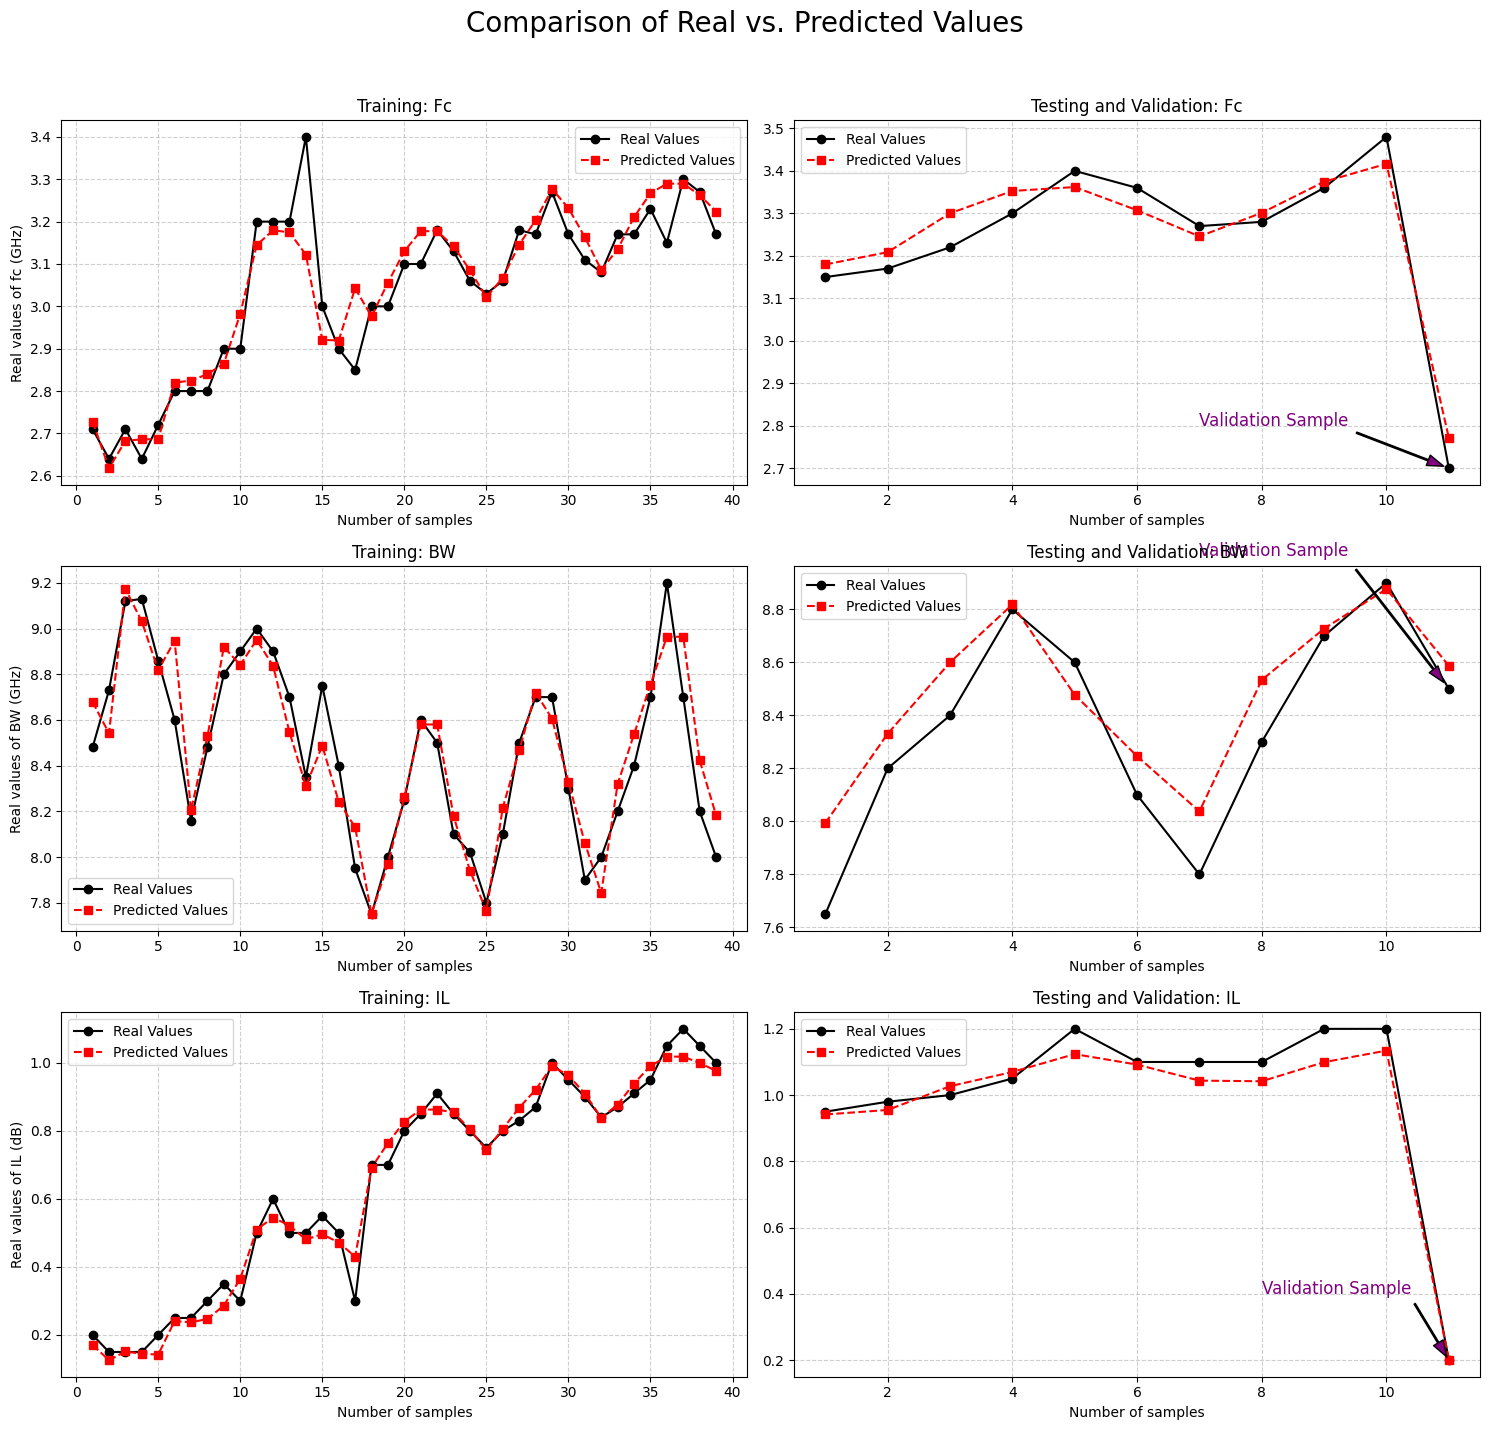

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Get Predictions for all Datasets ---
# We need to predict on the scaled data and then inverse_transform the results
# to get them back into their original units (GHz, dB, etc.)

# Training set predictions
predicted_train_scaled = model.predict(X_train_scaled)
predicted_train = scaler_y.inverse_transform(predicted_train_scaled)

# Testing set predictions
predicted_test_scaled = model.predict(X_test_scaled)
predicted_test = scaler_y.inverse_transform(predicted_test_scaled)

# Validation set prediction
predicted_val_scaled = model.predict(X_val_scaled)
predicted_val = scaler_y.inverse_transform(predicted_val_scaled)


# --- 2. Prepare Data for Plotting ---
# Combine the test and validation sets to match the paper's graph
y_test_and_val = pd.concat([y_test, y_val])
predicted_test_and_val = np.vstack([predicted_test, predicted_val])


# --- 3. Create the 3x2 Grid of Plots ---
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Comparison of Real vs. Predicted Values', fontsize=20, y=0.95)

# Plotting parameters
real_style = {'color': 'black', 'marker': 'o', 'linestyle': '-', 'label': 'Real Values'}
pred_style = {'color': 'red', 'marker': 's', 'linestyle': '--', 'label': 'Predicted Values'}

# --- Plot (a): Fc (Cut-off Frequency) ---
# Training Plot for Fc
axs[0, 0].plot(np.arange(1, 40), y_train['Fc'], **real_style)
axs[0, 0].plot(np.arange(1, 40), predicted_train[:, 0], **pred_style)
axs[0, 0].set_title('Training: Fc')
axs[0, 0].set_ylabel('Real values of fc (GHz)')
axs[0, 0].set_xlabel('Number of samples')
axs[0, 0].legend()
axs[0, 0].grid(True, linestyle='--', alpha=0.6)

# Testing & Validation Plot for Fc
axs[0, 1].plot(np.arange(1, 12), y_test_and_val['Fc'], **real_style)
axs[0, 1].plot(np.arange(1, 12), predicted_test_and_val[:, 0], **pred_style)
axs[0, 1].set_title('Testing and Validation: Fc')
axs[0, 1].set_xlabel('Number of samples')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', alpha=0.6)
# Add arrow for validation sample
axs[0, 1].annotate('Validation Sample', xy=(11, y_test_and_val['Fc'].iloc[-1]), xytext=(7, 2.8),
                   arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=8),
                   color='purple', fontsize=12)


# --- Plot (b): BW (Bandwidth) ---
# Training Plot for BW
axs[1, 0].plot(np.arange(1, 40), y_train['BW'], **real_style)
axs[1, 0].plot(np.arange(1, 40), predicted_train[:, 1], **pred_style)
axs[1, 0].set_title('Training: BW')
axs[1, 0].set_ylabel('Real values of BW (GHz)')
axs[1, 0].set_xlabel('Number of samples')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle='--', alpha=0.6)

# Testing & Validation Plot for BW
axs[1, 1].plot(np.arange(1, 12), y_test_and_val['BW'], **real_style)
axs[1, 1].plot(np.arange(1, 12), predicted_test_and_val[:, 1], **pred_style)
axs[1, 1].set_title('Testing and Validation: BW')
axs[1, 1].set_xlabel('Number of samples')
axs[1, 1].legend()
axs[1, 1].grid(True, linestyle='--', alpha=0.6)
# Add arrow for validation sample
axs[1, 1].annotate('Validation Sample', xy=(11, y_test_and_val['BW'].iloc[-1]), xytext=(7, 9.0),
                   arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=8),
                   color='purple', fontsize=12)


# --- Plot (c): IL (Insertion Loss) ---
# Training Plot for IL
axs[2, 0].plot(np.arange(1, 40), y_train['IL'], **real_style)
axs[2, 0].plot(np.arange(1, 40), predicted_train[:, 2], **pred_style)
axs[2, 0].set_title('Training: IL')
axs[2, 0].set_ylabel('Real values of IL (dB)')
axs[2, 0].set_xlabel('Number of samples')
axs[2, 0].legend()
axs[2, 0].grid(True, linestyle='--', alpha=0.6)

# Testing & Validation Plot for IL
axs[2, 1].plot(np.arange(1, 12), y_test_and_val['IL'], **real_style)
axs[2, 1].plot(np.arange(1, 12), predicted_test_and_val[:, 2], **pred_style)
axs[2, 1].set_title('Testing and Validation: IL')
axs[2, 1].set_xlabel('Number of samples')
axs[2, 1].legend()
axs[2, 1].grid(True, linestyle='--', alpha=0.6)
# Add arrow for validation sample
axs[2, 1].annotate('Validation Sample', xy=(11, y_test_and_val['IL'].iloc[-1]), xytext=(8, 0.4),
                   arrowprops=dict(facecolor='purple', shrink=0.05, width=1, headwidth=8),
                   color='purple', fontsize=12)


# --- 4. Display the Plots ---
plt.tight_layout(rect=[0, 0, 1, 0.93]) # Adjust layout to make room for suptitle
plt.show()


In [ ]:
# Save the entire model to a single file.
model.save('my_ann_model.keras')

print("Model saved successfully as 'my_ann_model.keras'")

Model saved successfully as 'my_ann_model.keras'


In [ ]:
from google.colab import files

# Prompt your browser to download the file.
files.download('my_ann_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>